In [1]:
#! pip3 install yfinance

In [2]:
#! pip install pandas-datareader

In [1]:
import pandas_datareader as pdr 
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import yfinance as yf
yf.pdr_override()

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
BAC = df['BAC']
C = df['C']
GS = df['GS']
JPM = df ['JPM']
MS = df['MS']
WFC = df['WFC']
alternate = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [3]:
import pandas_datareader.data as web
start = datetime(2006, 1, 1)
end = datetime(2016,1,1)
stocks = web.get_data_yahoo(['BAC','MS','JPM','GS','C','WFC'], start,end)

[*********************100%***********************]  6 of 6 completed


In [4]:
df = stocks.copy()

In [5]:
df.columns.names = ['stock_info','Bank Ticker']

In [7]:
df.columns = df.columns.swaplevel(0,1)
df.sort_index(axis=1, level=0, inplace=True)
df

Bank Ticker        BAC                                              \
stock_info   Adj Close      Close       High        Low       Open   
Date                                                                 
2006-01-03   34.596096  47.080002  47.180000  46.150002  46.919998   
2006-01-04   34.228691  46.580002  47.240002  46.450001  47.000000   
2006-01-05   34.272778  46.639999  46.830002  46.320000  46.580002   
2006-01-06   34.221321  46.570000  46.910000  46.349998  46.799999   
2006-01-09   34.243366  46.599998  46.970001  46.360001  46.720001   
...                ...        ...        ...        ...        ...   
2015-12-24   15.651771  17.270000  17.379999  17.219999  17.320000   
2015-12-28   15.524892  17.129999  17.230000  16.980000  17.219999   
2015-12-29   15.660836  17.280001  17.350000  17.160000  17.250000   
2015-12-30   15.452384  17.049999  17.240000  17.040001  17.200001   
2015-12-31   15.252998  16.830000  17.070000  16.830000  17.010000   

Bank Ticker                       C                                      ...  \
stock_info       Volume   Adj Close       Close        High         Low  ...   
Date                                                                     ...   
2006-01-03   16296700.0  379.511047  492.899994  493.799988  481.100006  ...   
2006-01-04   17757900.0  372.504486  483.799988  491.000000  483.500000  ...   
2006-01-05   14970700.0  374.352448  486.200012  487.799988  484.000000  ...   
2006-01-06   12599800.0  374.352448  486.200012  489.000000  482.000000  ...   
2006-01-09   15619400.0  372.581421  483.899994  487.399994  483.000000  ...   
...                 ...         ...         ...         ...         ...  ...   
2015-12-24   29369400.0   47.070763   52.709999   52.970001   52.450001  ...   
2015-12-28   41777500.0   46.776062   52.380001   52.570000   51.959999  ...   
2015-12-29   45670400.0   47.311878   52.980000   53.220001   52.740002  ...   
2015-12-30   35066400.0   46.704628   52.299999   52.939999   52.250000  ...   
2015-12-31   47153000.0   46.213451   51.750000   52.389999   51.750000  ...   

Bank Ticker         MS                                         WFC             \
stock_info        High        Low       Open     Volume  Adj Close      Close   
Date                                                                            
2006-01-03   58.490002  56.740002  57.169998  5377000.0  20.723480  31.900000   
2006-01-04   59.279999  58.349998  58.700001  7977800.0  20.483118  31.530001   
2006-01-05   58.590000  58.020000  58.549999  5778000.0  20.460379  31.495001   
2006-01-06   58.849998  58.049999  58.770000  6889800.0  20.580564  31.680000   
2006-01-09   59.290001  58.619999  58.630001  4144500.0  20.577309  31.674999   
...                ...        ...        ...        ...        ...        ...   
2015-12-24   32.709999  32.439999  32.570000  2798200.0  46.380711  54.820000   
2015-12-28   32.360001  31.950001  32.360001  5420300.0  46.262257  54.680000   
2015-12-29   32.700001  32.330002  32.439999  6388200.0  46.778351  55.290001   
2015-12-30   32.650002  32.200001  32.500000  5057200.0  46.439926  54.889999   
2015-12-31   32.299999  31.770000  31.910000  8154300.0  45.991516  54.360001   

Bank Ticker                                               
stock_info        High        Low       Open      Volume  
Date                                                      
2006-01-03   31.975000  31.195000  31.600000  11016400.0  
2006-01-04   31.820000  31.365000  31.799999  10870000.0  
2006-01-05   31.555000  31.309999  31.500000  10158000.0  
2006-01-06   31.775000  31.385000  31.580000   8403800.0  
2006-01-09   31.825001  31.555000  31.674999   5619600.0  
...                ...        ...        ...         ...  
2015-12-24   55.090000  54.709999  54.970001   4999400.0  
2015-12-28   54.779999  54.169998  54.549999   8288800.0  
2015-12-29   55.349998  54.990002  55.110001   7894900.0  
2015-12-30   55.310001  54.790001  55.270000   8016900.

In [ ]:
df.isnull().sum()

# EDA

###  a.) What  is  the  max  Close  price  for  each  bank's  stock  throughout  the  time  period?

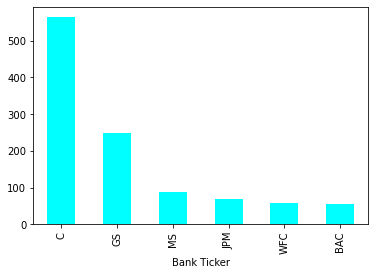

In [49]:
max_close_price = df.xs('Close', level='stock_info', axis = 1).max().sort_values(ascending = False).plot(kind = 'bar'
                                                                                                         ,color = 'aqua')

### b.) Create  a  new  empty  DataFrame  called  returns.  This  dataframe  will  contain  the  returns  for  each  bank's  stock.  returns  are  typically  defined  by:

In [12]:
returns = pd.DataFrame()

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

for tick in tickers:
    returns[tick +' Return'] = df[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### d.) Create  a  pairplot  using  seaborn  of  the  returns  dataframe.  What  stock  stands  out  to  you?  Can  you  figure  out  why?

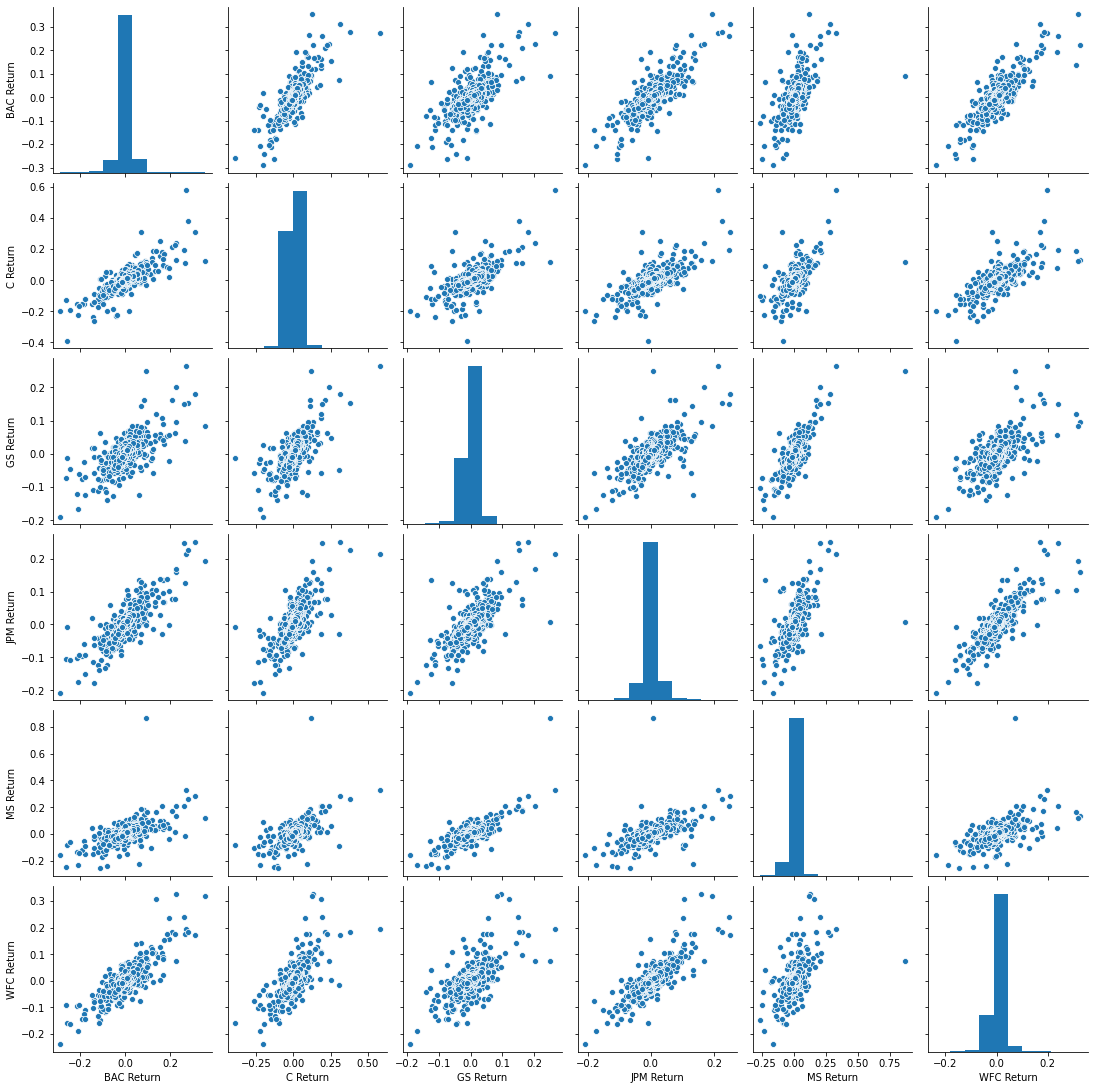

In [13]:
sns.pairplot(data = returns)

### f.) Using  this  returns  DataFrame,  figure  out  on  what  dates  each  bank  stock  had  the  best  and  worst  single  day  returns.  You  should  notice  that  4  ofthe  banks  share  the  same  day  for  the  worst  drop,  did  anything  significant  happen  that  day?

In [15]:
BAC = pdr.datareader('BAC','google',start,end)

AttributeError: module 'pandas_datareader' has no attribute 'datareader'

In [17]:
returns.index
print('maxreturns',returns.idxmax())
print('______________________________________________________')
print('minreturns',returns.idxmin())



maxreturns BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]
______________________________________________________
minreturns BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]


### 

### h.) Take  a  look  at  the  standard  deviation  of  the  returns,  which  stock  would  you  classify  as  the  riskiest  over  the  entire  time  period?  Which  would  you  classify  as  the  riskiest  for  the  year  2015?

In [18]:
returns.std()

BAC Return    0.036640
C Return      0.038664
GS Return     0.025385
JPM Return    0.027662
MS Return     0.037812
WFC Return    0.030232
dtype: float64

Text(0.5, 1.0, 'Banks volatility')

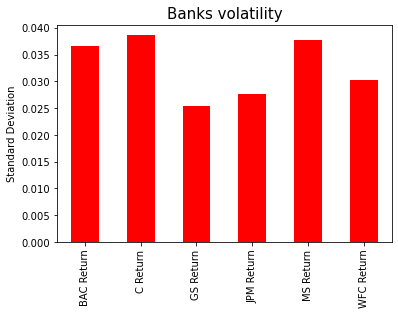

In [19]:
returns.std().plot(kind='bar', color='red')
plt.ylabel('Standard Deviation')
plt.title('Banks volatility', fontsize=15)


' riskiest stocks in 2015 was morgan stanley with the highest volatility'

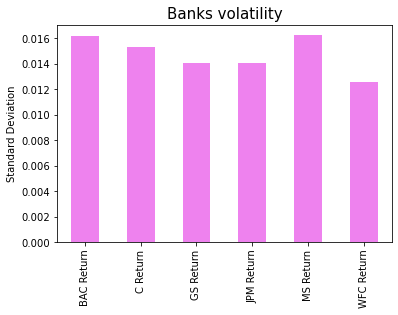

In [22]:
returns.loc['2015-01-01':'2015-12-31'].std().plot(kind = 'bar',color = 'violet')
plt.ylabel('Standard Deviation')
plt.title('Banks volatility', fontsize=15)

''' riskiest stocks in 2015 was morgan stanley with the highest volatility'''


### i.) Create a distplot using seaborn of the 2015 returns for Morgan Stanley



In [77]:
returns.reset_index(inplace=True)

In [78]:
df1 = returns[returns['Date'].isin(pd.date_range('2015-01-01','2015-12-31'))]

<AxesSubplot:xlabel='MS Return'>

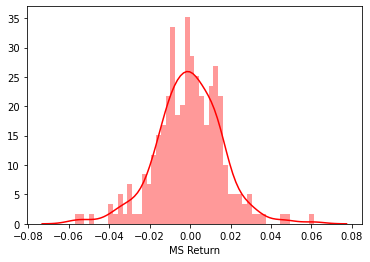

In [79]:
sns.distplot(df1['MS Return'],bins = 50,color = 'red')

<AxesSubplot:xlabel='C Return'>

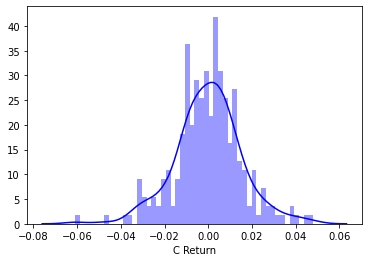

In [82]:
df3 = returns[returns['Date'].isin(pd.date_range('2015-01-01','2015-12-31'))]
sns.distplot(df3['C Return'],bins = 50,color = 'blue')

<AxesSubplot:xlabel='C Return'>

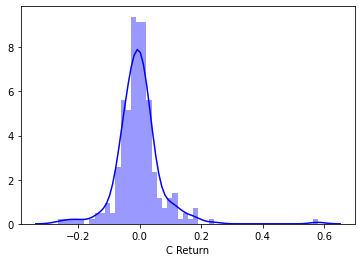

In [81]:
df2 = returns[returns['Date'].isin(pd.date_range('2008-01-01','2008-12-31'))]
sns.distplot(df2['C Return'],bins = 50,color = 'blue')

### Create  a  line  plot  showing  Close  price  for  each  bank  for  the  entire  index  of  time.  (Hint:  Try  using  a  for  loop,  or  use.xsto  get  a  cross  section  of  the  data.)

<AxesSubplot:xlabel='Date'>

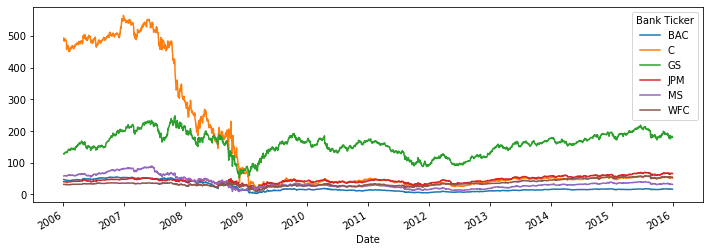

In [20]:
df.xs('Close', level='stock_info', axis = 1).plot(figsize=(12,4),label=tick)


### Create  a  heatmap  of  the  correlation  between  the  stocks  Close  Price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

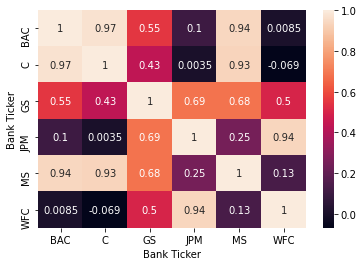

In [21]:
sns.heatmap(df.xs(key='Close',axis=1,level='stock_info').corr(),annot=True,cmap = 'rocket')


### Use  seaborn's  clustermap  to  cluster  the  correlations  together

<Figure size 720x360 with 0 Axes>

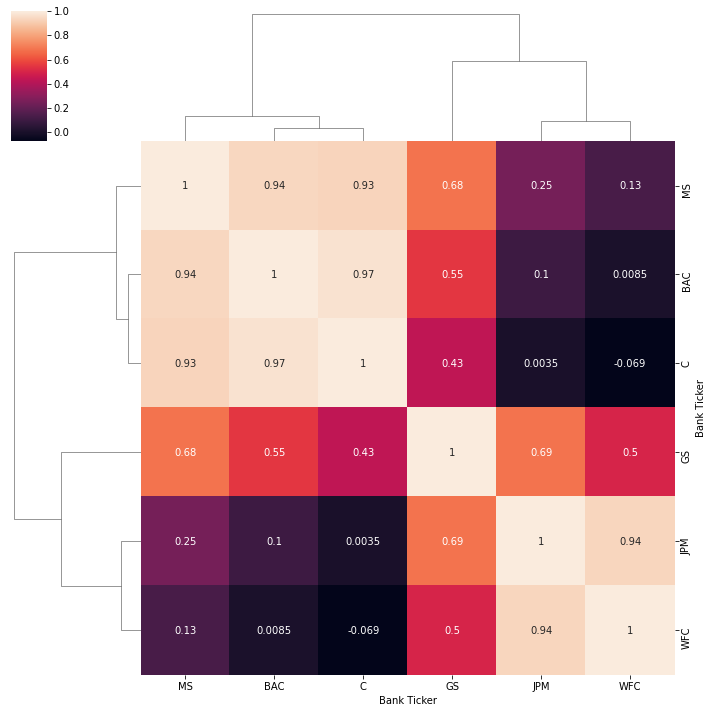

In [25]:
sns.clustermap(df.xs(key='Close',axis=1,level='stock_info').corr(),annot=True)

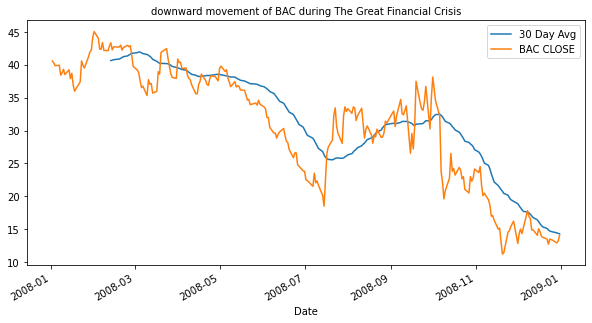

In [97]:
plt.figure(figsize=(10,5))
plt.title('downward movement of BAC during The Great Financial Crisis', size=10)

BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()